In [2]:
import pandas as pd

shark_data = pd.read_csv("Shark_Incidents.csv") # read in the csv file that contains the shark incident data

shark_data.drop(['Comment', 'Confirmed Source', 'WFL Case #', 'County', 'Location'], axis=1, inplace=True) # dropping unnecessary columns
shark_data.drop(shark_data.index[211:], inplace=True) # drops rows that contained notes from the data collector(s)

shark_data.to_csv('modded_shark_incidents.csv', index=False) # after removing columns/rows that aren't needed
                                                                # saved that data to a new csv file

In [4]:
useful_shark = pd.read_csv('modded_shark_incidents.csv') # read in the new and useful csv
useful_shark.head()

,IncidentNum,Date,Time,Mode,Injury,Depth,Species,Longitude,Latitude
0,1,10/08/1950,12:00,Swimming,major,surface,White,-117.1466667,32.588333
1,2,05/27/1952,14:00,Swimming,minor,surface,White,-117.2466667,32.588333
2,3,12/07/1952,14:00,Swimming,fatal,surface,White,-122.05,36.626667
3,4,02/06/1955,12:00,Freediving,minor,surface,White,-122.15,36.626667
4,5,08/14/1956,16:30,Swimming,major,surface,White,-120.6466667,35.138333


In [7]:
mode = []
for i in useful_shark["Mode"]:
    mode.append(i)

injury_activities = ['Swimming', 'Free Diving', 'Scuba Diving', 'Hookah Diving', 'Surfing/Boarding', \
                     'Paddleboarding', 'Kayaking/Canoeing', 'Walking'] #x-axis
injury_activities_counts = [] #y-axis

swimming_count = mode.count("Swimming")
injury_activities_counts.append(swimming_count)

freediving_count = mode.count("Freediving")
injury_activities_counts.append(freediving_count)

scuba_diving_count = mode.count("Scuba Diving")
injury_activities_counts.append(scuba_diving_count)

hookah_diving_count = mode.count("Hookah Diving")
injury_activities_counts.append(hookah_diving_count)

surfing_boarding_count = mode.count("Surfing / Boarding")
injury_activities_counts.append(surfing_boarding_count)

paddleboarding_count = mode.count("Paddleboarding")
injury_activities_counts.append(paddleboarding_count)

kayaking_canoeing_count = mode.count("Kayaking / Canoeing")
injury_activities_counts.append(kayaking_canoeing_count)

walking_count = mode.count("Walking in shallow")
injury_activities_counts.append(walking_count)

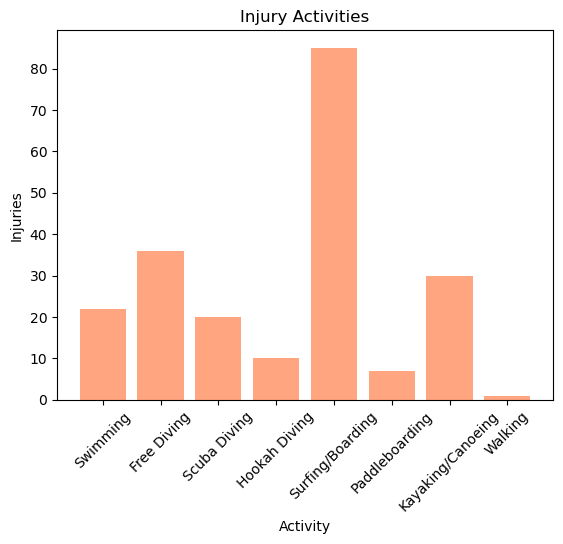

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

plt.bar(injury_activities, injury_activities_counts, color = (1.0, 0.647, 0.5))
plt.title("Injury Activities")
plt.xlabel("Activity")
plt.xticks(rotation = 45)
plt.ylabel("Injuries")
plt.show()

In [79]:
import pandas as pd

df_sharks = pd.read_csv('modded_shark_incidents.csv')
df_sharks['Depth'] = pd.to_numeric(df_sharks['Depth'], errors='coerce')
df_sharks = df_sharks[df_sharks['Depth'].notna()]

mean_depth = df_sharks['Depth'].mean().round(2)
min_depth = df_sharks['Depth'].min()
max_depth = df_sharks['Depth'].max()

print("mean_depth, min_depth, max_depth

(25.23, 5.0, 72.0)